In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
import os
import sys

In [2]:
circ_dir = '/home/19060815/personalGit/stuff_t/four-shapes/shapes/circle/*.png'
tri_dir = '/home/19060815/personalGit/stuff_t/four-shapes/shapes/triangle/*.png'
square_dir = '/home/19060815/personalGit/stuff_t/four-shapes/shapes/square/*.png'
    
if (os.path.exists("square_dir") != True) :
    print('on home pc')
    circ_dir = '/home/hendri/KaggleSets/four-shapes/circle/*.png'
    tri_dir = '/home/hendri/KaggleSets/four-shapes/triangle/*.png'
    square_dir = '/home/hendri/KaggleSets/four-shapes/square/*.png'

#creating a collection with the available images
circ_col = imread_collection(circ_dir)
tri_col = imread_collection(tri_dir)
square_col = imread_collection(square_dir)

on home pc


In [3]:
X_train = np.concatenate((circ_col[0:500], tri_col[0:500]), axis = 0)

In [4]:
#0 = circle
#1 = tri
#2 = square
train_size = 500
num_classes = 2
circ_label = np.zeros(train_size, dtype = int)
tri_label = np.ones(train_size, dtype = int)
square_label = np.full(train_size,2)

Y_train = np.concatenate((circ_label, tri_label), axis = 0)

In [5]:
#test data
test_size = 50
X_test = np.concatenate((circ_col[600:600 + test_size], tri_col[600:600 + test_size]), axis = 0)

circ_label_test = np.zeros(test_size)
tri_label_test = np.ones(test_size)
square_label_test = np.full(test_size,2)

Y_test = np.concatenate((circ_label_test, tri_label_test), axis = 0)

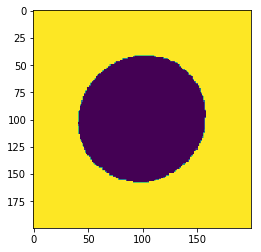

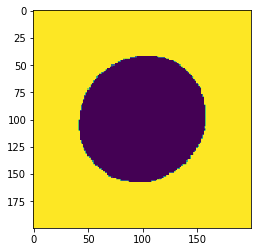

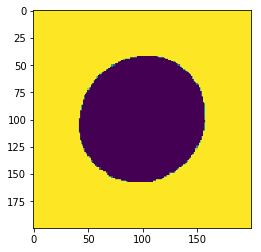

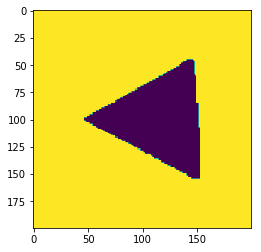

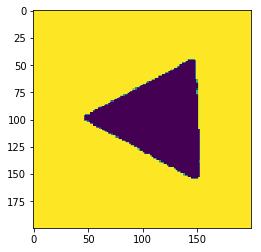

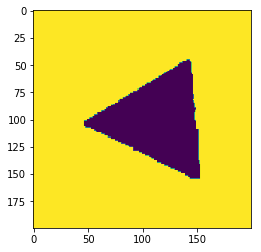

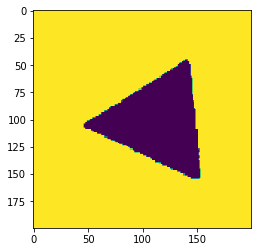

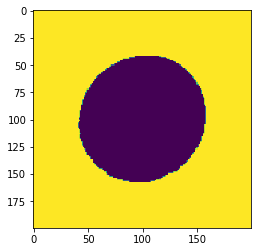

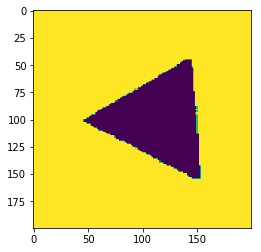

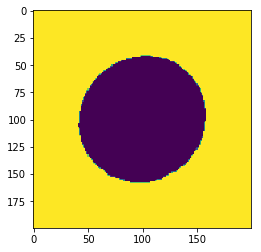

In [6]:
test_shuf = np.concatenate((circ_col[700:705], tri_col[700:705]), axis = 0)

np.random.shuffle(test_shuf)
for i in test_shuf:
    plt.figure()
    plt.imshow(i)

In [7]:
def flatten_data(size, num_classes, X_array):
    X_flat = X_array.reshape(size*num_classes, X_array.shape[1]*X_array.shape[2])
    return X_flat.T

In [8]:
X_train = flatten_data(train_size, num_classes, X_train)
X_test = flatten_data(test_size, num_classes, X_test)

In [9]:
#flatten

X_square = square_col[30:40]
X_square = np.asarray(X_square)
X_square = flatten_data(X_square.shape[0], 1, X_square)

test_shuf = flatten_data(test_shuf.shape[0], 1, test_shuf)

#normalize data
# new val = (old val- min)/(max-min)
# min = 0, max = 255
X_train = X_train/255.0
X_test = X_test/255.0
test_shuf = test_shuf/255.0

In [10]:
#every column is an image

In [11]:
def init_weights_bias(dim):
    w = np.full((dim,1), 0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    y_h = 1/(1+np.exp(-z))
    return y_h

In [12]:
scaling_factor = 1000

In [13]:
# mean square error
def loss_func(y_train, y_head):
    loss = (y_train - y_head)**2
    cost = np.sum(loss)*1/y_train.shape[0]
    return cost

In [14]:
def forw_prop(w,b,x_train, y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
#     loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = loss_func(y_train, y_head)
    der_weight = (np.dot(x_train, (y_head - y_train).T))/scaling_factor
    der_bias = np.sum(y_head- y_train)/scaling_factor
    
    return cost, der_weight, der_bias

In [15]:
def update_weights(old_weight, old_bias, der_weight, der_bias, learning_rate):
    #back prop
    new_weight =  old_weight - learning_rate*der_weight
    new_bias = old_bias - learning_rate*der_bias
    #update parameters
    return new_weight, new_bias

In [16]:
def main(learning_rate, num_iterations):
    dim = X_train.shape[0]
    w_main, b_main = init_weights_bias(dim)
    
    for i in range(0, num_iterations):
        cost, d_weight, d_bias = forw_prop(w_main, b_main, X_train, Y_train)
        w_main, w_bias = update_weights(w_main, b_main, d_weight, d_bias, learning_rate)
#         print(i)
        if i %10 == 0:
            print("cost after " + str(i) + " is " + str(cost))
            
    return w_main,b_main

In [17]:
def predict(w,b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_pred = np.zeros(x_test.shape[1])
    for i in range(0, x_test.shape[1]):
        if z[0][i] > 0.5 :
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred 

In [18]:
def log_reg(x_train, y_train, x_test, y_test, learning_rate, num_it):
    w, b = main(1,100)
    final_w = w
    final_b = b
#     print("w " + str(w))
    
    return predict(w,b, x_test), w,b

In [19]:
y_pred, w, b = log_reg(X_train, Y_train, X_test, Y_test, 1, 100)
#accuracy:
100 - np.mean(np.abs(y_pred-Y_test))

cost after 0 is 0.5


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


cost after 10 is 0.5
cost after 20 is 4.693318163587766e-53
cost after 30 is 4.693318163587766e-53
cost after 40 is 4.693318163587766e-53
cost after 50 is 4.693318163587766e-53
cost after 60 is 4.693318163587766e-53
cost after 70 is 4.693318163587766e-53
cost after 80 is 4.693318163587766e-53
cost after 90 is 4.693318163587766e-53


100.0

In [20]:
#test with random image
square_test = predict(w, b, X_square)
#classidies all squares as triangles

In [21]:
tri_col_shuf_test = predict(w, b, test_shuf)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [22]:
print(tri_col_shuf_test)
#compare to shapes printed out above, accuracy is 100%

[0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]


In [23]:
#Verdict: Too little variation/noise in training data.